In [1]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
#import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_json("../data/train.json")

In [6]:
data.features[10000]

[u'Doorman', u'Elevator', u'Fitness Center', u'Cats Allowed', u'Dogs Allowed']

In [7]:
data.shape

(49352, 15)

In [8]:
data.head(10)

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street
100014,2.0,4,38a913e46c94a7f46ddf19b756a9640c,2016-04-19 04:24:47,,West 18th Street,[],medium,40.7429,6894514,-74.0028,b209e2c4384a64cc307c26759ee0c651,[https://photos.renthop.com/2/6894514_9abb8592...,7995,350 West 18th Street
100016,1.0,2,3ba49a93260ca5df92fde024cb4ca61f,2016-04-27 03:19:56,Stunning unit with a great location and lots o...,West 107th Street,"[prewar, elevator, Dogs Allowed, Cats Allowed,...",low,40.8012,6930771,-73.9660,01287194f20de51872e81f660def4784,[https://photos.renthop.com/2/6930771_7e3622b6...,3600,210 West 107th Street
100020,2.0,1,0372927bcb6a0949613ef5bf893bbac7,2016-04-13 06:01:42,"This huge sunny ,plenty of lights 1 bed/2 bath...",West 21st Street,"[Doorman, Elevator, Pre-War, Terrace, Laundry ...",low,40.7427,6867392,-73.9957,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/6867392_b18283f6...,5645,155 West 21st Street
100026,1.0,1,a7efbeb58190aa267b4a9121cd0c88c0,2016-04-20 02:36:35,<p><a website_redacted,Hamilton Terrace,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",medium,40.8234,6898799,-73.9457,c1a6598437b7db560cde66e5a297a53f,[https://photos.renthop.com/2/6898799_3759be4c...,1725,63 Hamilton Terrace
100027,2.0,4,0,2016-04-02 02:58:15,This is a spacious four bedroom with every bed...,522 E 11th,"[Dishwasher, Hardwood Floors]",low,40.7278,6814332,-73.9808,23a01ea7717b38875f5b070282d1b9d2,[https://photos.renthop.com/2/6814332_e19a8552...,5800,522 E 11th


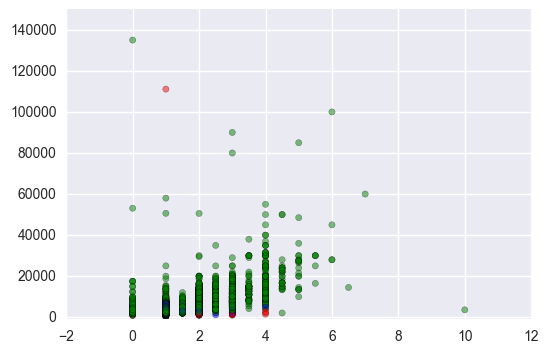

In [17]:
import matplotlib.pyplot as plt
import pandas as pd


df = data[['bathrooms','price','interest_level']]

fig, ax = plt.subplots()

colors = {'low':'green', 'medium':'blue', 'high':'red'}

ax.scatter(df['bathrooms'], df['price'], c=df['interest_level'].apply(lambda x: colors[x]), alpha = 0.5)
plt.ylim(ymax = 150000, ymin = -1000)

plt.show()
#The majority of low interest level apt with 0 to 5 bathroom have price less than 20000

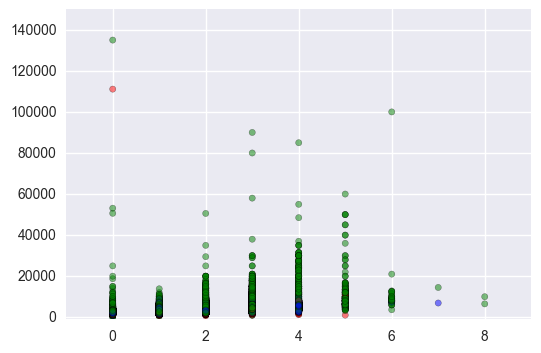

In [15]:
import matplotlib.pyplot as plt
import pandas as pd


df = data[['bedrooms','price','interest_level']]

fig, ax = plt.subplots()

colors = {'low':'green', 'medium':'blue', 'high':'red'}

ax.scatter(df['bedrooms'], df['price'], c=df['interest_level'].apply(lambda x: colors[x]),alpha =0.5)
plt.ylim(ymax = 150000, ymin = -1000)

plt.show()

(3, 12)

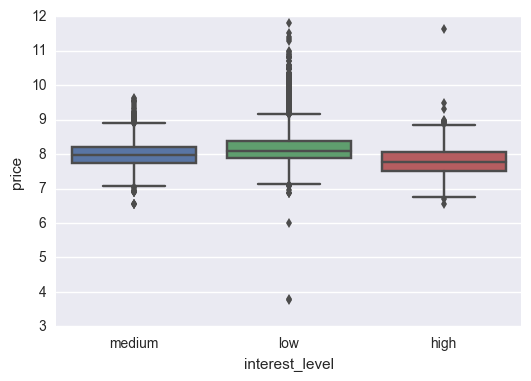

In [16]:
import seaborn as sns
sns.boxplot(x="interest_level", y=np.log(data["price"]), data=data)
plt.ylim(ymax = 12, ymin = 3)

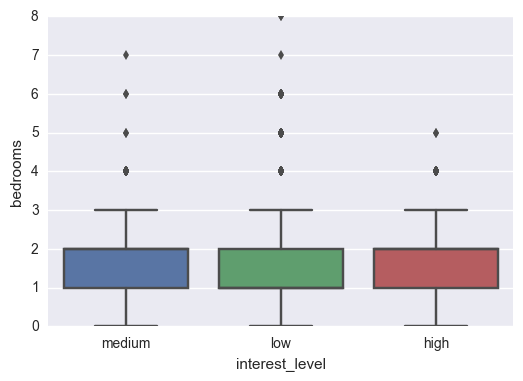

In [19]:
import seaborn as sns
sns.boxplot(x="interest_level", y="bedrooms", data=data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13aff3e90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13b08d390>]], dtype=object)

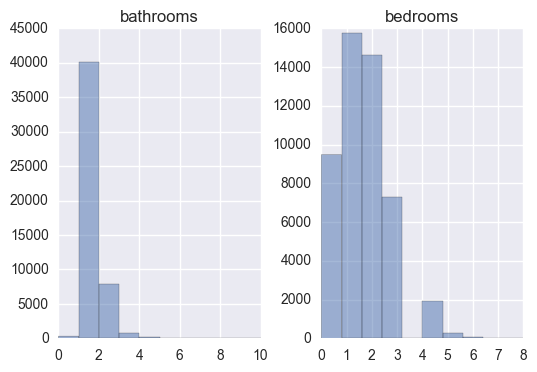

In [14]:
df1 = data[['bedrooms','bathrooms']]
df1.hist(alpha =0.5)

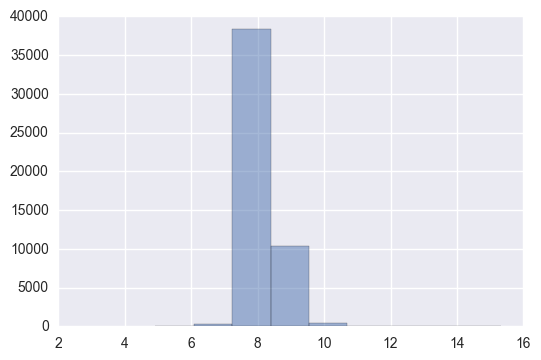

In [21]:
df2 = np.log(data['price'])
df2.hist(alpha = 0.5)

In [23]:
from sklearn import svm
from sklearn.cross_validation import train_test_split
X = data[['price','bedrooms','bathrooms']]
y = data["interest_level"]
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=42)

clf = svm.SVC()
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)